In [79]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import json
import plotly.graph_objects as go
from geopy.geocoders import Nominatim
from shapely.geometry import Point, Polygon
from area import area
from sklearn import neighbors

%matplotlib inline

In [80]:
postmates = pd.read_csv('/Users/baileyrusso/PycharmProjects/GrubHubScraper/postmates_all7.csv')
postmates = postmates.loc[:, ~postmates.columns.str.contains('^Unnamed')]

# Categories with most favorites

In [81]:
groupedCat = postmates.groupby('Category').aggregate('mean').sort_values('Favorites',ascending=False).head(25)
groupedCat

,Favorites,MenuItemPrice,Latitude,Longitude
Category,,,,
MAC & CHEESE,617.000000,13.557246,40.730168,-73.983649
SOUTHERN,579.000000,4.274938,40.723624,-73.978938
DIM SUM,405.306011,17.420055,40.776923,-73.966243
VEGAN,362.886997,9.900375,40.753844,-73.982506
LATIN AMERICAN,354.391304,8.398098,40.720107,-73.993666
SHANGHAI,330.000000,17.365854,40.668645,-73.993636
KOREAN,310.736011,15.672457,40.734706,-73.985151
DESSERT,234.977242,15.814407,40.752924,-73.983517
ITALIAN,223.681698,16.167608,40.749495,-73.965858


# Restaurants with Most Favorites

In [82]:
groupedName = postmates.groupby('Name').aggregate('mean').sort_values('Favorites',ascending=False).head(25)
groupedName

,Favorites,MenuItemPrice,Latitude,Longitude
Name,,,,
KazuNori | The Original Handroll Bar,3300.000000,14.710938,40.659813,-74.001266
SUGARFISH,1900.000000,19.974490,40.725149,-74.003624
Philippe Chow,1000.000000,30.328125,40.764192,-73.970314
Bondi Sushi - Nomad,1000.000000,8.310345,40.744668,-73.987560
The Halal Guys,961.412698,6.228525,40.762668,-73.977129
Thai Villa,928.171429,13.033333,40.738981,-73.990706
Bonchon Chicken,774.000000,10.247368,40.747406,-73.985097
Grace Street,765.000000,12.569385,40.747860,-73.986477
The Butchers Daughter,757.000000,8.900000,40.720716,-73.994785


# Checking Relationship b/w Menu Item Price and Num Favorites

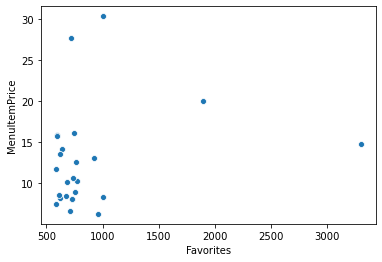

In [83]:
sns.scatterplot('Favorites','MenuItemPrice',data=groupedName,)

# Most Popular Categories

In [84]:
postmates.groupby(['Category','Name']).count().reset_index()['Category'].value_counts()

AMERICAN           60
PIZZA              45
ITALIAN            38
DELI               35
CHINESE            27
                   ..
FOOD & BEVERAGE     1
MODERN EUROPEAN     1
TAIWANESE           1
FOOD TRUCK          1
TURKISH             1
Name: Category, Length: 76, dtype: int64

# Checking Relationship b/w Favorites and Number of Menu Items

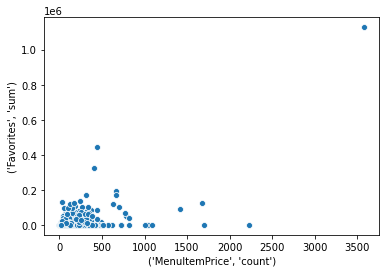

In [85]:
groupedNumItems = postmates.groupby('Name').aggregate(['count','sum'])[[('Favorites','sum'),('MenuItemPrice','count')]]#.sort_values('MenuItem',ascending=False)

sns.scatterplot(('MenuItemPrice','count'), ('Favorites','sum'), data=groupedNumItems)


In [86]:
groupedNumItems.corr()

,,Favorites,MenuItemPrice
,,sum,count
Favorites,sum,1.000000,0.606417
MenuItemPrice,count,0.606417,1.000000


# Most Popular Menu Items Sold

In [87]:
popItems = postmates['MenuItem'].value_counts().head(1000).to_frame()
popItems = popItems.reset_index()
popItems.columns = ['MenuItem','NumMenuItems']
postmatesPopItems = pd.merge(postmates, popItems, on='MenuItem').sort_values('NumMenuItems', ascending=False)

In [96]:
#postmatesPopItems.to_csv('postmatesPopItems.csv')
#postmatesPopItems['MenuItem'].unique()
[i for i in postmatesPopItems['MenuItem'].unique()]

['French Fries',
 'Onion Rings',
 'Iced Tea',
 'Soda',
 'Bottled Water',
 'Iced Coffee',
 'Mozzarella Sticks',
 'Caesar Salad',
 'Cappuccino',
 'Sweet Potato Fries',
 'Hot Chocolate',
 'Lemonade',
 'Snapple',
 'Coffee',
 'Greek Salad',
 'Espresso',
 'Diet Coke (can)',
 'Coke (can)',
 'Gatorade',
 'Water (bottle)',
 'Cheeseburger',
 'Coke',
 'Cheese Fries',
 'Tea',
 'Brown Rice',
 'Orange Juice',
 'Turkey Burger',
 'Carrot Cake',
 'White Rice',
 'Diet Coke',
 'Latte',
 'Fried Calamari',
 'Sprite (can)',
 'Veggie Burger',
 'Poland Spring Water',
 'Edamame',
 'Red Bull',
 'Hamburger',
 'Diet Coke Can',
 'Bacon Cheeseburger',
 'Home Fries',
 'Curly Fries',
 'French Toast',
 'Iced Latte',
 'Tiramisu',
 'Potato Salad',
 'Canned Soda',
 'Coleslaw',
 'Tuna Salad',
 'Egg Salad Sandwich',
 'Herbal Tea',
 'Chicken Salad Sandwich',
 'Seaweed Salad',
 'Garlic Bread',
 'Chocolate Chip Cookie',
 'Chicken Fingers',
 'Tuna Salad Sandwich',
 'Cheesecake',
 'Croissant',
 'Sprite',
 'Cobb Salad',
 'Miso S

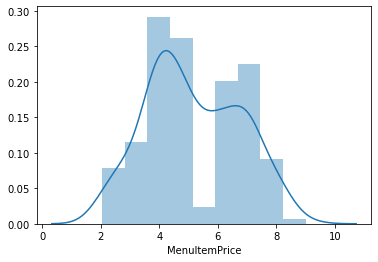

In [68]:
sns.distplot(postmatesPopItems[postmatesPopItems['MenuItem'] == 'French Fries']['MenuItemPrice'])

# Distrubution of Popular Menu Item Prices

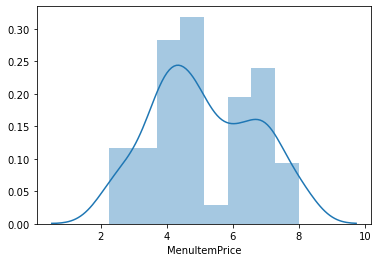

In [11]:
sns.distplot(postmates[postmates['MenuItem'] == 'French Fries']['MenuItemPrice'])

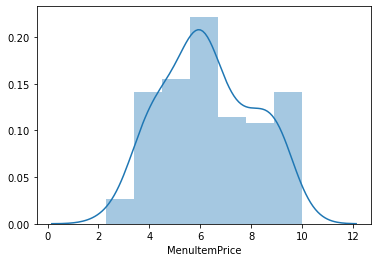

In [12]:
sns.distplot(postmates[postmates['MenuItem'] == 'Onion Rings']['MenuItemPrice'])

In [13]:
postmates[postmates['MenuItem'] == 'French Fries'].sort_values('MenuItemPrice').head(20)

,Name,Category,Favorites,Address,MenuItem,MenuItemDescription,MenuItemPrice,Address_Coordinates,Latitude,Longitude
48918,"b""Wendys""",FAST FOOD,161.0,20 E 14TH STREET,French Fries,"Natural-cut, skin-on, sea-salted fries served ...",2.25,"(40.735443, -73.992632)",40.735443,-73.992632
1639,Wendy's,FAST FOOD,51.0,85 NASSAU STREET,French Fries,"Natural-cut, skin-on, sea-salted fries served ...",2.25,"(nan,)",NaN,NaN
1693,Wendy's,FAST FOOD,51.0,85 NASSAU STREET,French Fries,"Natural-cut, skin-on, sea-salted fries served ...",2.25,"(nan,)",NaN,NaN
58917,"b""Wendys""",FAST FOOD,73.0,714 3RD AVE,French Fries,"Natural-cut, skin-on, sea-salted fries served ...",2.29,"(40.7526054, -73.9733371)",40.752605,-73.973337
2412,Burger King,FAST FOOD,0.0,106 FULTON ST,French Fries,NaN,2.29,"(40.709584199999995, -74.007034739265)",40.709584,-74.007035
82450,"b""Wendys""",FAST FOOD,405.0,938 EIGHTH AVENUE,French Fries,"Natural-cut, skin-on, sea-salted fries served ...",2.29,"(nan,)",NaN,NaN
82396,"b""Wendys""",FAST FOOD,405.0,938 EIGHTH AVENUE,French Fries,"Natural-cut, skin-on, sea-salted fries served ...",2.29,"(nan,)",NaN,NaN
48260,"b""McDonalds""",FAST FOOD,63.0,541 6TH AVE,French Fries,NaN,2.39,"(40.6646468, -73.98650185)",40.664647,-73.986502
27693,McDonald's,FAST FOOD,0.0,1528 BROADWAY,French Fries,NaN,2.49,"(40.8996615, -73.8971489)",40.899662,-73.897149
55043,"b""Sams Deli & Pizza""",DELI,0.0,155 8TH AVE,French Fries,NaN,2.50,"(40.7421688, -74.00108205453915)",40.742169,-74.001082


# Sorting Items By Median Menu Item Price

In [14]:
postmates.groupby('Name').median().sort_values('MenuItemPrice', ascending=False).head(60)

,Favorites,MenuItemPrice,Latitude,Longitude
Name,,,,
111 Lex Wine & Liquors,0.0,46.990,40.742352,-73.982450
Baked By Melissa,0.0,46.000,40.709745,-74.007019
Sweet Reha,0.0,38.020,40.726725,-74.001944
Sant Ambroeus 1000 Madison,583.0,32.000,40.775465,-73.963085
Nobu Fifty Seven,469.0,30.000,40.646134,-74.022767
Sweet Rehab,0.0,28.520,NaN,NaN
Mr. Chow New York,255.0,28.500,40.643320,-74.017936
NYC Wine & Spirits,0.0,28.490,40.789473,-73.975905
Bar Italia,344.0,28.000,40.767928,-73.968562


# Sorting Restaurants By Number of Locations

In [15]:
postmates.groupby(['Name','Address_Coordinates']).count().reset_index()['Name'].value_counts().sort_values(ascending=False).head(60)

Brekkie Bagels                                  5
Subway                                          4
Killer Wings                                    4
Shake Shack                                     4
Burger King                                     4
The Ice Cream Shop                              4
Popeyes Louisiana Kitchen                       3
Dos Toros Taqueria                              3
Chipotle Mexican Grill                          3
Krispy Kreme Doughnuts                          3
Gong Cha                                        3
Taco Bell                                       3
b"Wendys"                                       3
Playa Bowls                                     3
Wham! Bam! Burrito!                             3
Just Salad                                      3
The Halal Guys                                  3
Dig                                             3
B*tch Don't Grill My Cheese                     3
Pressed Juicery                                 3


In [16]:
postmates.sort_values(['MenuItem','MenuItemPrice'])

,Name,Category,Favorites,Address,MenuItem,MenuItemDescription,MenuItemPrice,Address_Coordinates,Latitude,Longitude
27871,Famous Original Ray's Pizza,PIZZA,143.0,736 7TH AVE,"""Bunless"" Keto Friendly Burger",Served with Lettuce & Tomato,9.50,"(40.7603624, -73.984012)",40.760362,-73.984012
53204,"b""Famous Original Rays Pizza""",PIZZA,104.0,204 9TH AVE,"""Bunless"" Keto Friendly Burger",Served with Lettuce & Tomato,9.50,"(40.7460286, -74.0014102)",40.746029,-74.001410
88995,"b""Famous Original Rays Pizza""",PIZZA,82.0,462 COLUMBUS AVE,"""Bunless"" Keto Friendly Burger",Served with Lettuce & Tomato,9.50,"(40.7841453, -73.9741189)",40.784145,-73.974119
23034,Flowers Cafe,CAFE,83.0,39 ESSEX STREET,"""Dirty"" Potato Chips","Gluten free and kettle cooked to perfection, e...",2.50,"(40.7162314, -73.98969331114047)",40.716231,-73.989693
39642,Healthy Market Food and Deli,DELI,0.0,632 10TH AVE,"""Dirty"" Potato Chips",5 oz. Small bag.,3.99,"(40.7613835, -73.9939749)",40.761384,-73.993975
...,...,...,...,...,...,...,...,...,...,...
81139,"b""Friedmans""",GLUTEN-FREE,137.0,130 WEST 72ND STREET,NaN,NaN,NaN,"(40.7776746, -73.98008316234458)",40.777675,-73.980083
82321,Burrito Box,BURRITO,369.0,885 9TH AVE,NaN,NaN,NaN,"(40.7683165, -73.9856517)",40.768316,-73.985652
82883,Coco Fresh Tea & Juice,TEA,229.0,124 W 72ND ST,NaN,NaN,NaN,"(40.77759519999999, -73.97989911988495)",40.777595,-73.979899
84338,Naruto Ramen,RAMEN,0.0,2634 BROADWAY,NaN,NaN,NaN,"(40.7969581, -73.9697671)",40.796958,-73.969767
